In [1]:
import netCDF4 as nc
import pandas as pd
from netCDF4 import Dataset
from numpy import array
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
#tf.random.set_seed(7)
tf.random.set_seed(77)

In [2]:
nc_f    = './ConThkIstAlb.APP-x.1400.250x250.Beaufort.nc'
#nc_f    = './icecon.APPX.90N.135W.nc'
nc_fid  = Dataset(nc_f, 'r')
time    = nc_fid.variables['time'][:]

In [3]:
sic    = nc_fid.variables['icecon'][:,0,0]

In [4]:
split = int(0.8 * len(sic))
sic_train  = sic[: split - 1]
sic_test   = sic[split:]
time_train = time[: split - 1]
time_test  = time[split:]

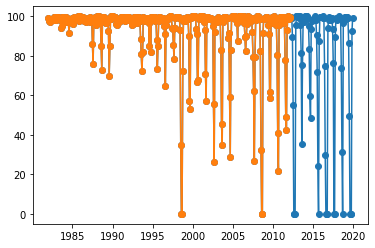

In [5]:
plt.plot(time,sic,'-o')
plt.plot(time_train,sic_train,'-o')

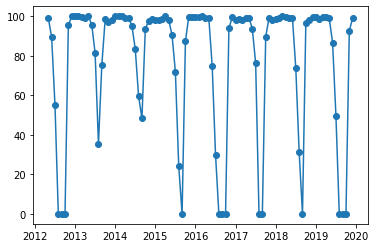

In [6]:
plt.plot(time_test,sic_test,'-o')

In [7]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                        break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return array(X), array(y)

In [8]:
n_steps = 12
X,y = split_sequence(sic,n_steps)
print(X.shape)
print(y.shape)
print(X[0:5,:])

(444, 12)
(444,)
[[98.9 97.5 97.3 97.5 98.4 98.8 98.2 98.6 97.9 99.4 99.6 99.7]
 [97.5 97.3 97.5 98.4 98.8 98.2 98.6 97.9 99.4 99.6 99.7 98.2]
 [97.3 97.5 98.4 98.8 98.2 98.6 97.9 99.4 99.6 99.7 98.2 99.5]
 [97.5 98.4 98.8 98.2 98.6 97.9 99.4 99.6 99.7 98.2 99.5 99.6]
 [98.4 98.8 98.2 98.6 97.9 99.4 99.6 99.7 98.2 99.5 99.6 99.8]]


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X[0:5,:])

[[0.40248787 0.33754227 0.32814822 0.33715457 0.37858185 0.39703706
  0.37057328 0.39267808 0.3636914  0.43367472 0.44474846 0.44989887]
 [0.33762562 0.32827666 0.33741343 0.37884513 0.3971094  0.36924627
  0.38910306 0.36037424 0.4316196  0.44256905 0.44911918 0.3843237 ]
 [0.32835975 0.33754227 0.3791076  0.3973743  0.36931792 0.38777333
  0.3566762  0.42959702 0.44067657 0.4470162  0.3835572  0.44115564]
 [0.33762562 0.3792382  0.39763838 0.36958033 0.38784546 0.35535124
  0.4261626  0.4388266  0.44520503 0.38030782 0.44037774 0.44552726]
 [0.3793228  0.39776975 0.36984205 0.38810953 0.35542256 0.4248275
  0.43542734 0.44344136 0.37727684 0.43812189 0.44474846 0.4542708 ]]


In [10]:
split = int(0.8 * len(X))
X_train = X[: split - 1]
X_test = X[split:]

y_train = y[: split - 1]
y_test = y[split:]

print(X_train.shape)
print(X_test.shape)

(354, 12)
(89, 12)


In [11]:
def basic_MLP(n_steps=36):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=n_steps))
    #model.add(Dropout(0.3))
    #model.add(Dense(100))
    #model.add(Dropout(0.3))
    #model.add(Dense(100))
    #model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [12]:
mlp_model = basic_MLP(n_steps)

In [13]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,401
Trainable params: 1,401
Non-trainable params: 0
_________________________________________________________________


In [14]:
mlp_history = mlp_model.fit(X_train ,y_train, epochs=400, shuffle=False, batch_size=8, verbose=1)

Epoch 1/400
45/45 [==============================] - 0s 684us/step - loss: 8707.7461
Epoch 2/400
45/45 [==============================] - 0s 680us/step - loss: 8435.8623
Epoch 3/400
45/45 [==============================] - 0s 610us/step - loss: 8052.0557
Epoch 4/400
45/45 [==============================] - 0s 590us/step - loss: 7504.9062
Epoch 5/400
45/45 [==============================] - 0s 562us/step - loss: 6780.5210
Epoch 6/400
45/45 [==============================] - 0s 574us/step - loss: 5907.4326
Epoch 7/400
45/45 [==============================] - 0s 545us/step - loss: 4942.3081
Epoch 8/400
45/45 [==============================] - 0s 565us/step - loss: 3962.8401
Epoch 9/400
45/45 [==============================] - 0s 603us/step - loss: 3052.0308
Epoch 10/400
45/45 [==============================] - 0s 554us/step - loss: 2279.7578
Epoch 11/400
45/45 [==============================] - 0s 554us/step - loss: 1681.8365
Epoch 12/400
45/45 [==============================] - 0s 680us/

45/45 [==============================] - 0s 545us/step - loss: 61.1378
Epoch 194/400
45/45 [==============================] - 0s 538us/step - loss: 61.0157
Epoch 195/400
45/45 [==============================] - 0s 512us/step - loss: 60.8907
Epoch 196/400
45/45 [==============================] - 0s 509us/step - loss: 60.7751
Epoch 197/400
45/45 [==============================] - 0s 515us/step - loss: 60.6411
Epoch 198/400
45/45 [==============================] - 0s 510us/step - loss: 60.5210
Epoch 199/400
45/45 [==============================] - 0s 550us/step - loss: 60.3969
Epoch 200/400
45/45 [==============================] - 0s 558us/step - loss: 60.2708
Epoch 201/400
45/45 [==============================] - 0s 526us/step - loss: 60.1398
Epoch 202/400
45/45 [==============================] - 0s 519us/step - loss: 60.0270
Epoch 203/400
45/45 [==============================] - 0s 525us/step - loss: 59.9152
Epoch 204/400
45/45 [==============================] - 0s 520us/step - loss: 59

45/45 [==============================] - 0s 610us/step - loss: 48.5763
Epoch 386/400
45/45 [==============================] - 0s 715us/step - loss: 48.5245
Epoch 387/400
45/45 [==============================] - 0s 840us/step - loss: 48.4808
Epoch 388/400
45/45 [==============================] - 0s 724us/step - loss: 48.4489
Epoch 389/400
45/45 [==============================] - 0s 580us/step - loss: 48.4108
Epoch 390/400
45/45 [==============================] - 0s 541us/step - loss: 48.3751
Epoch 391/400
45/45 [==============================] - 0s 547us/step - loss: 48.3317
Epoch 392/400
45/45 [==============================] - 0s 539us/step - loss: 48.2936
Epoch 393/400
45/45 [==============================] - 0s 533us/step - loss: 48.2633
Epoch 394/400
45/45 [==============================] - 0s 547us/step - loss: 48.2112
Epoch 395/400
45/45 [==============================] - 0s 532us/step - loss: 48.1871
Epoch 396/400
45/45 [==============================] - 0s 546us/step - loss: 48

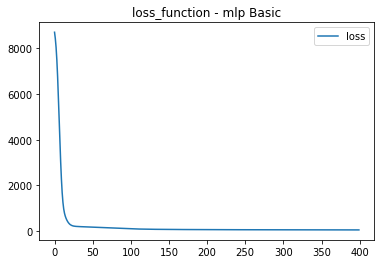

In [15]:
plt.plot(mlp_history.history["loss"])
plt.title("loss_function - mlp Basic")
plt.legend(["loss"])
plt.show()

In [16]:
h = mlp_model.evaluate(X_test, y_test, verbose=0)

In [17]:
from sklearn.metrics import r2_score
predictions = mlp_model.predict(X_test)
test_r2 = r2_score(y_test, predictions)

RMSE with MLP method =  22.296008600458485
CORR with MLP method =  0.6164506205350613


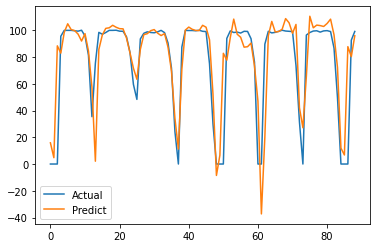

In [18]:
mlp_acc_df = pd.DataFrame()
mlp_acc_df['Actual'] = y_test
mlp_acc_df['Predict'] = predictions
mlp_acc_df.plot()
print('RMSE with MLP method = ', h**0.5)
print('CORR with MLP method = ', test_r2)

In [19]:
# Dumb model: SIC from previous year
prev_val = y_test[0]
sse = 0

for n in range(12, len(y_test)-1):
    err = y_test[n] - prev_val
    sq_err = err ** 2
    sse = sse + sq_err
    prev_val = y_test[n-11]

mse = sse / n
#mse**0.5

In [20]:
# Dumb model: SIC from previous year
predict = pd.DataFrame(y_test, columns = ["dumb_predict"])
predict = predict.shift(12)
predict["actual"] = y_test
predict.fillna(value=0, inplace=True)
correct_cols = ["actual", "dumb_predict"]
predict = predict.reindex(columns=correct_cols)
#predict[12:]

In [21]:
from sklearn.metrics import r2_score
predictions = predict["dumb_predict"].values
test_r2 = r2_score(y_test[12:], predictions[12:])
#test_r2 = r2_score(y_test, predictions)

RMSE with SIC from Last Year =  25.071238936560555
CORR with SIC from Last Year =  0.41617065993448443


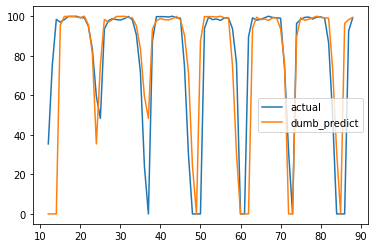

In [22]:
predict[12:].plot()
print('RMSE with SIC from Last Year = ', mse**0.5)
print('CORR with SIC from Last Year = ', test_r2)